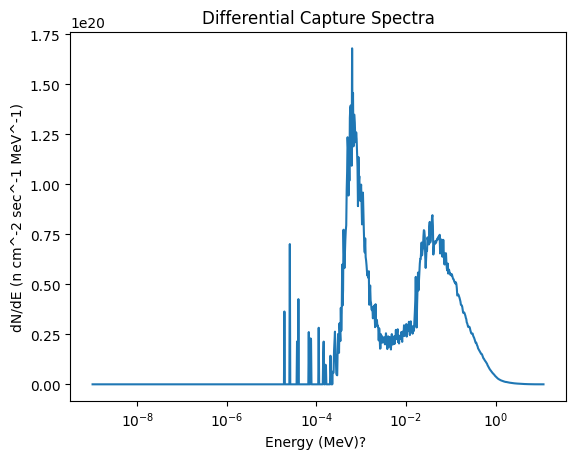

In [56]:
import numpy as np
import matplotlib.pyplot as plt
home_dir='/home/tylerbmark/SeniorDesign/Neutronics/scripts/my_work/test_MOX1000/'
output_dir=home_dir+'mox1000_works_det0.m'
var='DET2 '

nukedata={
    'DET1 ': 'Flux per lethargy',
    'DET2 ': 'Differential Capture Spectra',
    'DET3 ': 'Differential Fission Spectra',
    'DET4 ': 'Differential Production Spectra',
    'DET5 ': 'Integral Capture Spectra',
    'DET6 ': 'Integral Fission Spectra',
    'DET7 ': 'Integral Production Spectra',
    'DET8 ': 'Axial Fission Rate',
}

yaxis_dict={
    'DET1 ': 'n/',
    'DET2 ':'dN/dE (n cm^-2 sec^-1 MeV^-1)',
    'DET3 ':'dN/dE (n cm^-2 sec^-1 MeV^-1)',
    'DET4 ':'dN/dE (n cm^-2 sec^-1 MeV^-1)',
    'DET5 ':'(n sec^-1?)',
    'DET6 ':'(n sec^-1?)',
    'DET7 ':'(n sec^-1?)',
    'DET8 ':'(n sec^-1?)',
}
evar=var.split()[0]+'E '
on_var=False
on_evar=False
xdata=np.array([])
ydata=np.array([])
# powsum=0
with open(output_dir) as f:
    lines=f.readlines()
    for line in lines:
        if on_var==True:
            if ']' in line:
                on_var=False
            else:
                ydata=np.append(ydata,float(line.split()[-3]))
        elif var in line and on_var==False:
            on_var=True
        elif on_evar==True:
            if ']' in line:
                on_evar=False
                break
            else:
                xdata=np.append(xdata,float(line.split()[-1]))
        elif evar in line and on_evar==False:
            on_evar=True
        else:
            continue
# print(len(xdata),len(ydata))
ydata,xdata

plt.plot(xdata,ydata)
plt.title(nukedata[var])
# plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel(yaxis_dict[var])
plt.show()